<a href="https://colab.research.google.com/github/phytometrics/plant_phenotyping_python/blob/dev/notebooks/depth_anything.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 深度推定基盤モデルの活用
![title](https://github.com/LiheYoung/Depth-Anything/blob/main/assets/teaser.png?raw=true)
Depth Anything公式レポジトリより


- Yang, L., Kang, B., Huang, Z., Xu, X., Feng, J., & Zhao, H. (2024). Depth Anything: Unleashing the Power of Large-Scale Unlabeled Data. In arXiv [cs.CV]. arXiv. http://arxiv.org/abs/2401.10891
 - arXiv non-exclusive license
- 公式レポジトリ
    - https://github.com/LiheYoung/Depth-Anything
    - Apache-2.0
- 本ノートブック
    - CC-By-NC-4.0

## 解説
近年、「基盤モデル」という言葉をよく耳にするようになりました。これは事前学習済みの汎用的な大規模モデルのことを指します。基盤モデルを活用することで、様々なタスクにおいて高い性能を発揮できるようになってきています。しかし、depth（深度）推定の分野では、大規模なデータが不足しているため、基盤モデルの実現は難しいとされてきました。

「Depth Anything」モデルの開発者らは、labeledデータ（正解ラベルが付与されたデータ）が少ない問題を解決するために、unlabeledデータ（正解ラベルが付与されていないデータ）を大量に収集することを提案しています。なんと62Mもの大量のunlabeled画像を使って、様々な画像に対応可能な超汎用的なdepth推定モデル「Depth Anything」を構築しました。

6つの代表的なdepthデータセットを用いて、zero-shot（事前学習のみ、ファインチューニングなし）での性能を評価した結果、最先端の手法であるMiDaSを大幅に上回る性能を達成しました。加えて、metric depth（実際のスケール情報付きのdepth）でファインチューニングを行った場合も、非常に優れた性能を発揮することが確認されています。

## 環境設定

In [1]:
!git clone https://github.com/LiheYoung/Depth-Anything
#!cd Depth-Anything && pip install -r requirements.txt

Cloning into 'Depth-Anything'...
remote: Enumerating objects: 421, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 421 (delta 101), reused 40 (delta 39), pack-reused 277
Receiving objects: 100% (421/421), 237.89 MiB | 31.62 MiB/s, done.
Resolving deltas: 100% (144/144), done.
Updating files: 100% (219/219), done.


In [2]:
%cd /content/Depth-Anything
import cv2
import matplotlib.pyplot as plt

/content/Depth-Anything


In [3]:
image_url_1 = 'https://raw.githubusercontent.com/phytometrics/plant_phenotyping_python/main/notebooks/imgs/Arabidopsis_arenosa_kz01.jpeg'
image_url_2 = 'https://upload.wikimedia.org/wikipedia/commons/7/79/Oryza_sativa_Rice_sprouts_ja01.jpg'
!wget -O image_1.jpg {image_url_1}
!wget -O image_2.jpg {image_url_2}

--2024-04-24 04:43:13--  https://raw.githubusercontent.com/phytometrics/plant_phenotyping_python/main/notebooks/imgs/Arabidopsis_arenosa_kz01.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79390 (78K) [image/jpeg]
Saving to: ‘image_1.jpg’

image_1.jpg         100%[===================>]  77.53K  --.-KB/s    in 0.01s   

2024-04-24 04:43:14 (5.34 MB/s) - ‘image_1.jpg’ saved [79390/79390]

--2024-04-24 04:43:14--  https://upload.wikimedia.org/wikipedia/commons/7/79/Oryza_sativa_Rice_sprouts_ja01.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 860190 (840K) [imag

モデルファイルのダウンロード

In [4]:
from depth_anything.dpt import DepthAnything

encoder = 'vits' # or 'vitb' or 'vitl'
depth_anything = DepthAnything.from_pretrained('LiheYoung/depth_anything_{:}14'.format(encoder))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

xFormers not available
xFormers not available
Total parameters: 24.79M
100% 1/1 [00:08<00:00,  8.06s/it]


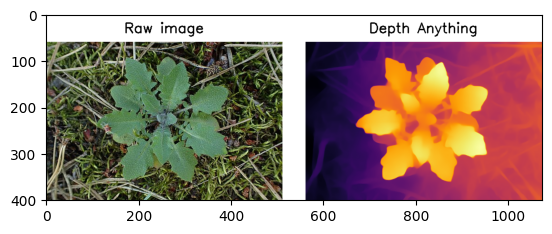

In [6]:
!python run.py --encoder vits --img-path image_1.jpg --outdir ../
depth = cv2.imread("/content/image_1_img_depth.png")[...,::-1]
plt.imshow(depth)

xFormers not available
xFormers not available
Total parameters: 24.79M
100% 1/1 [00:06<00:00,  6.08s/it]


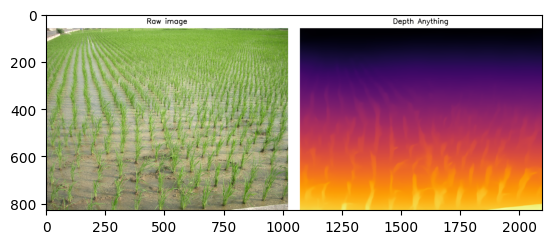

In [7]:
!python run.py --encoder vits --img-path image_2.jpg --outdir ../
depth = cv2.imread("/content/image_2_img_depth.png")[...,::-1]
plt.imshow(depth)